In [131]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from itertools import combinations

import scipy.cluster.hierarchy as sch

from sklearn.cluster import AgglomerativeClustering,KMeans
from sklearn.metrics import accuracy_score

In [132]:
dataset = pd.read_csv('input/cereal.csv')

In [133]:
dataset.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


In [134]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      77 non-null     object 
 1   mfr       77 non-null     object 
 2   type      77 non-null     object 
 3   calories  77 non-null     int64  
 4   protein   77 non-null     int64  
 5   fat       77 non-null     int64  
 6   sodium    77 non-null     int64  
 7   fiber     77 non-null     float64
 8   carbo     77 non-null     float64
 9   sugars    77 non-null     int64  
 10  potass    77 non-null     int64  
 11  vitamins  77 non-null     int64  
 12  shelf     77 non-null     int64  
 13  weight    77 non-null     float64
 14  cups      77 non-null     float64
 15  rating    77 non-null     float64
dtypes: float64(5), int64(8), object(3)
memory usage: 9.8+ KB


In [135]:
dataset.describe()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
count,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000
mean,106.883117,2.545455,1.012987,159.675325,2.151948,14.597403,6.922078,96.077922,28.246753,2.207792,1.029610,0.821039,42.665705
std,19.484119,1.094790,1.006473,83.832295,2.383364,4.278956,4.444885,71.286813,22.342523,0.832524,0.150477,0.232716,14.047289
min,50.000000,1.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,1.000000,0.500000,0.250000,18.042851
25%,100.000000,2.000000,0.000000,130.000000,1.000000,12.000000,3.000000,40.000000,25.000000,1.000000,1.000000,0.670000,33.174094
50%,110.000000,3.000000,1.000000,180.000000,2.000000,14.000000,7.000000,90.000000,25.000000,2.000000,1.000000,0.750000,40.400208
75%,110.000000,3.000000,2.000000,210.000000,3.000000,17.000000,11.000000,120.000000,25.000000,3.000000,1.000000,1.000000,50.828392
max,160.000000,6.000000,5.000000,320.000000,14.000000,23.000000,15.000000,330.000000,100.000000,3.000000,1.500000,1.500000,93.704912


In [136]:
columns_name = dataset.columns.tolist()
columns_name = columns_name[3:]
columns_comb = list(combinations(columns_name,2))
for i,comb in enumerate(columns_comb):
    print(i,comb)

0 ('calories', 'protein')
1 ('calories', 'fat')
2 ('calories', 'sodium')
3 ('calories', 'fiber')
4 ('calories', 'carbo')
5 ('calories', 'sugars')
6 ('calories', 'potass')
7 ('calories', 'vitamins')
8 ('calories', 'shelf')
9 ('calories', 'weight')
10 ('calories', 'cups')
11 ('calories', 'rating')
12 ('protein', 'fat')
13 ('protein', 'sodium')
14 ('protein', 'fiber')
15 ('protein', 'carbo')
16 ('protein', 'sugars')
17 ('protein', 'potass')
18 ('protein', 'vitamins')
19 ('protein', 'shelf')
20 ('protein', 'weight')
21 ('protein', 'cups')
22 ('protein', 'rating')
23 ('fat', 'sodium')
24 ('fat', 'fiber')
25 ('fat', 'carbo')
26 ('fat', 'sugars')
27 ('fat', 'potass')
28 ('fat', 'vitamins')
29 ('fat', 'shelf')
30 ('fat', 'weight')
31 ('fat', 'cups')
32 ('fat', 'rating')
33 ('sodium', 'fiber')
34 ('sodium', 'carbo')
35 ('sodium', 'sugars')
36 ('sodium', 'potass')
37 ('sodium', 'vitamins')
38 ('sodium', 'shelf')
39 ('sodium', 'weight')
40 ('sodium', 'cups')
41 ('sodium', 'rating')
42 ('fiber', '

In [137]:
def elbow(x):
    wcss = []
    for i in range(1, 11):
        km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 500, n_init = 10, random_state = 0)
        km.fit(x)
        wcss.append(km.inertia_)
        
    plt.plot(range(1, 11), wcss)
    plt.title('The Elbow Method', fontsize = 20)
    plt.xlabel('No. of Clusters')
    plt.ylabel('wcss')
    plt.show()

In [138]:
def km_algo(x,n_clus,col1,col2):
    colors = ['pink','yellow','cyan','magenta','orange']

    km = KMeans(n_clusters = n_clus, init = 'k-means++', max_iter = 500, n_init = 10, random_state = 0)
    y_means = km.fit_predict(x)
    
    for it in range(n_clus):
        plt.scatter(x[y_means == it, 0], x[y_means == it, 1], s = 100, c = colors[it])

    plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 50, c = 'blue' )

    plt.style.use('fivethirtyeight')
    plt.title('K Means Clustering', fontsize = 20)
    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.legend()
    plt.grid()
    plt.show()
    return y_means

In [139]:
def hc_algo(x,n_clus,col1,col2):
    colors = ['pink','yellow','cyan','magenta','orange']
    hc = AgglomerativeClustering(n_clusters = n_clus, affinity = 'euclidean', linkage = 'ward')
    y_hc = hc.fit_predict(x)
    

    for it in range(n_clus):
        plt.scatter(x[y_hc == it, 0], x[y_hc == it, 1], s = 100, c = colors[it])
    
    plt.style.use('fivethirtyeight')
    plt.title('Hierarchial Clustering', fontsize = 20)
    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.legend()
    plt.grid()
    plt.show()
    return y_hc

C:\Users\robyb\anaconda3\envs\kaggle\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Calories of Cereals against sugars(g)')

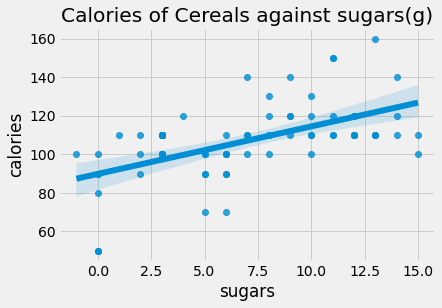

In [140]:
sns.regplot(dataset['sugars'],dataset['calories']).set_title("Calories of Cereals against sugars(g)")

C:\Users\robyb\anaconda3\envs\kaggle\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Carbo of Cereals against sugars(g)')

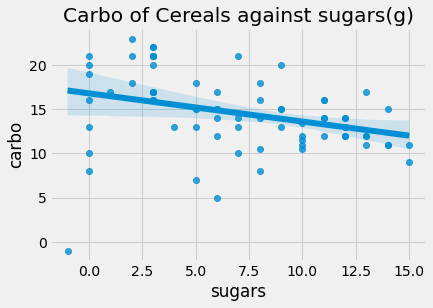

In [141]:
sns.regplot(dataset['sugars'],dataset['carbo']).set_title("Carbo of Cereals against sugars(g)")

C:\Users\robyb\anaconda3\envs\kaggle\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Rating of Cereals against protein(g)')

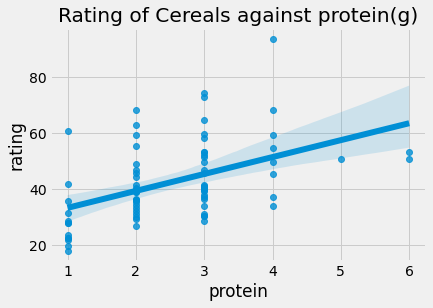

In [142]:
sns.regplot(dataset['protein'],dataset['rating']).set_title("Rating of Cereals against protein(g)")

In [143]:
dataset[dataset['protein']==4].sort_values(by='rating',ascending=False)

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
43,Maypo,A,H,100,4,1,0,0.0,16.0,3,95,25,2,1.0,1.00,54.850917
56,Quaker Oat Squares,Q,C,100,4,1,135,2.0,14.0,6,110,25,3,1.0,0.50,49.511874
41,Life,Q,C,100,4,2,150,2.0,12.0,6,95,25,2,1.0,0.67,45.328074
44,Muesli Raisins; Dates; & Almonds,R,C,150,4,3,95,3.0,16.0,11,170,25,3,1.0,1.00,37.136863
45,Muesli Raisins; Peaches; & Pecans,R,C,150,4,3,150,3.0,16.0,11,170,25,3,1.0,1.00,34.139765


C:\Users\robyb\anaconda3\envs\kaggle\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Rating of Cereals against calories')

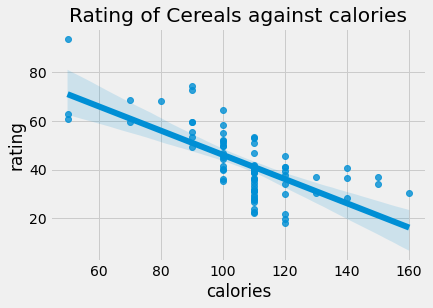

In [144]:
sns.regplot(dataset['calories'],dataset['rating']).set_title("Rating of Cereals against calories")

In [145]:
dataset[dataset['calories']<100].sort_values(by='rating',ascending=False)

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.00,0.50,93.704912
64,Shredded Wheat 'n'Bran,N,C,90,3,0,0,4.0,19.0,0,140,0,1,1.00,0.67,74.472949
65,Shredded Wheat spoon size,N,C,90,3,0,0,3.0,20.0,0,120,0,1,1.00,0.67,72.801787
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.00,0.33,68.402973
63,Shredded Wheat,N,C,80,2,0,0,3.0,16.0,0,95,0,1,0.83,1.00,68.235885
55,Puffed Wheat,Q,C,50,2,0,0,1.0,10.0,0,50,0,3,0.50,1.00,63.005645
54,Puffed Rice,Q,C,50,1,0,0,0.0,13.0,0,15,0,3,0.50,1.00,60.756112
50,Nutri-grain Wheat,K,C,90,3,0,170,3.0,18.0,2,90,25,3,1.00,1.00,59.642837
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.00,0.33,59.425505
68,Strawberry Fruit Wheats,N,C,90,2,0,15,3.0,15.0,5,90,25,2,1.00,1.00,59.363993


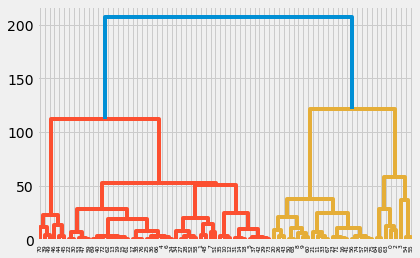

In [128]:
x = dataset[list(columns_comb[11])].values
dendrogram = sch.dendrogram(sch.linkage(x, method = 'ward'))

C:\Users\robyb\anaconda3\envs\kaggle\lib\site-packages\sklearn\cluster\_kmeans.py:1039: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


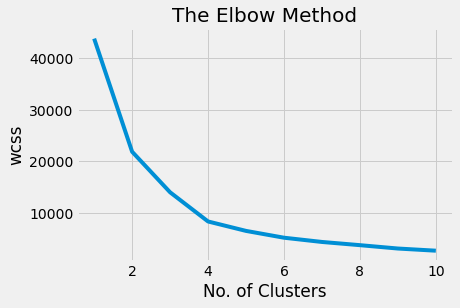

In [129]:
elbow(x)

No handles with labels found to put in legend.


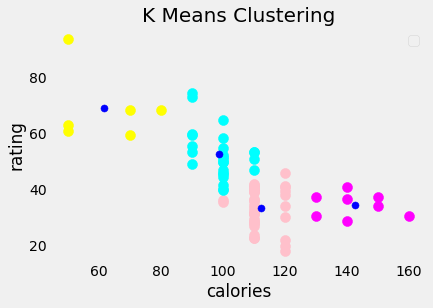

In [146]:
km_y_pred = km_algo(x,4,*columns_comb[11])


No handles with labels found to put in legend.


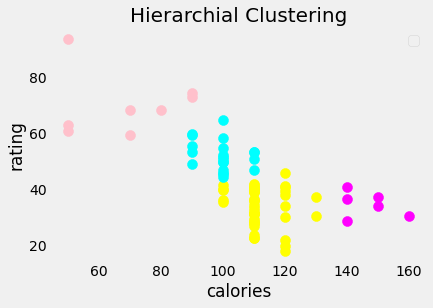

In [147]:
hc_y_pred=hc_algo(x,4,*columns_comb[11])

In [107]:
accuracy_score(km_y_pred,hc_y_pred)

0.35064935064935066

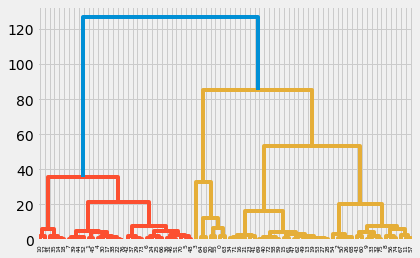

In [108]:
x = dataset[list(columns_comb[22])].values
dendrogram = sch.dendrogram(sch.linkage(x, method = 'ward'))

C:\Users\robyb\anaconda3\envs\kaggle\lib\site-packages\sklearn\cluster\_kmeans.py:1039: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


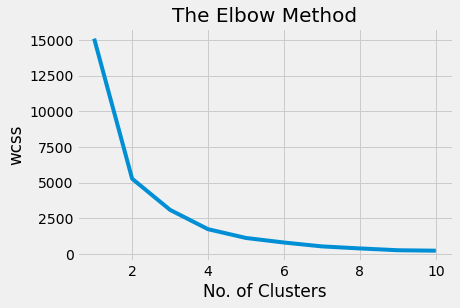

In [109]:
elbow(x)

No handles with labels found to put in legend.


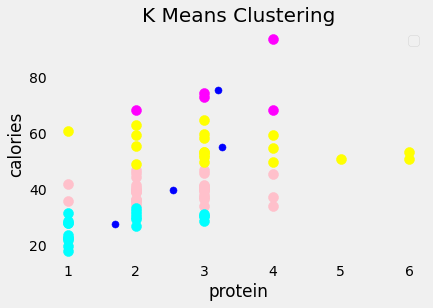

In [110]:
km_y_pred = km_algo(x,4,columns_comb[0][1],columns_comb[0][0])


No handles with labels found to put in legend.


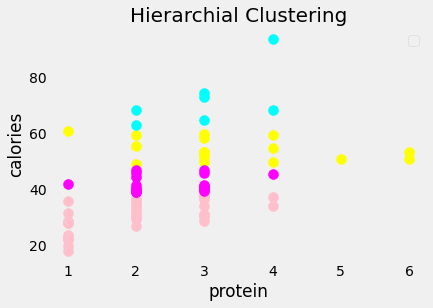

In [111]:
hc_y_pred=hc_algo(x,4,columns_comb[0][1],columns_comb[0][0])

In [112]:
accuracy_score(km_y_pred,hc_y_pred)

0.37662337662337664